<a href="https://colab.research.google.com/github/montassar-ML/project/blob/main/Gold_price_prediction_using_ML_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

data collrection andprocessing

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
# checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:
1. Positive Correlation
2. Negative Correlation

In [14]:
import pandas as pd

# Assuming 'gold_data' is your DataFrame
# Convert the 'Date' column to datetime objects
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Extract numerical features for correlation calculation
numerical_data = gold_data.select_dtypes(include=['number'])

# Calculate correlations on numerical columns only
correlation = numerical_data.corr()
print(correlation)


              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

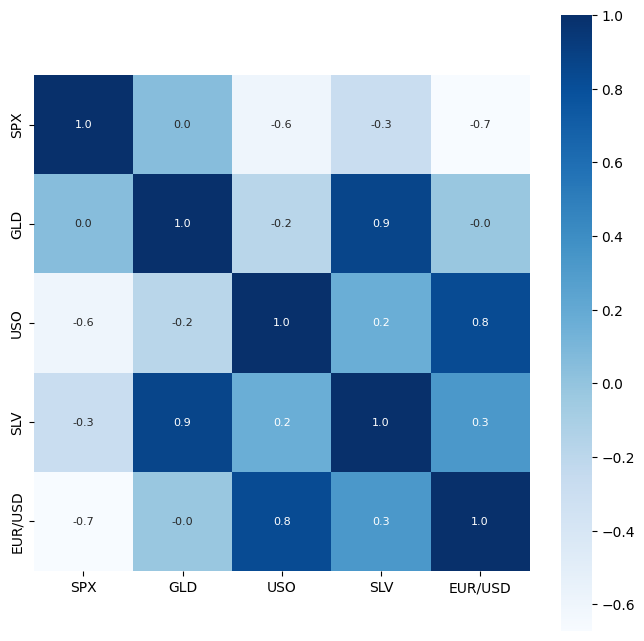

In [20]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')


In [21]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-23-ac1f2952a459>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='pink')


<Axes: xlabel='GLD', ylabel='Density'>

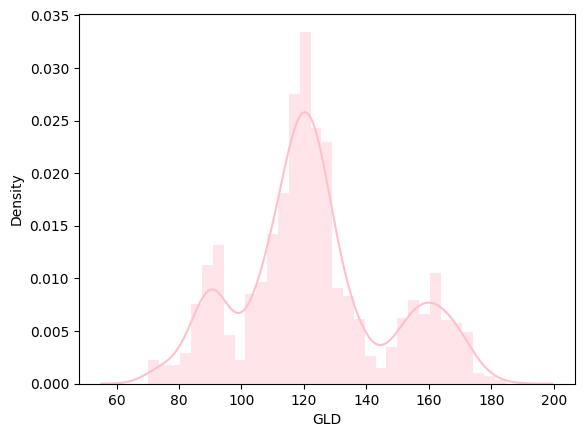

In [23]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='pink')

Splitting the Features and Target

In [24]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [25]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [26]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


## Splitting into Training data and Test Data

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## Model Training: Random Forest Regressor

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

## Model Evaluation

In [30]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[168.77229935  81.99799999 116.16890012 127.85470096 120.76040103
 154.75969789 150.57419913 126.06390043 117.54149879 126.10720051
 116.66690097 171.79310119 141.69539877 167.95629807 115.14650018
 117.64500037 141.89510316 170.17030114 160.11900249 159.40619894
 155.09750004 125.56590036 175.87370052 157.42350375 125.23000036
  93.88379997  77.52890052 120.53160028 119.14609945 167.49050002
  88.23950026 125.38420028  91.19840094 117.72780011 121.115799
 136.18440131 115.43040088 115.010601   147.11619978 107.03020116
 104.9439027   87.25059817 126.51310056 118.29000039 153.27839922
 119.62980014 108.50769974 107.98689795  93.31910077 127.2108976
  74.58130062 113.59169877 121.67590027 111.26249928 118.92719887
 120.46819976 159.57720084 167.75370114 147.03759718  85.68899855
  94.27670051  86.77269869  90.48440043 118.92490093 126.43970093
 127.45540006 170.25230074 122.2730993  117.56399873  98.16020022
 168.94850145 142.90879824 132.08010266 121.08580238 120.62899948
 119.76150032

In [32]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9887286874425345


## Compare the Actual Values and Predicted Values in a Plot

In [46]:
Y_test = list(Y_test)

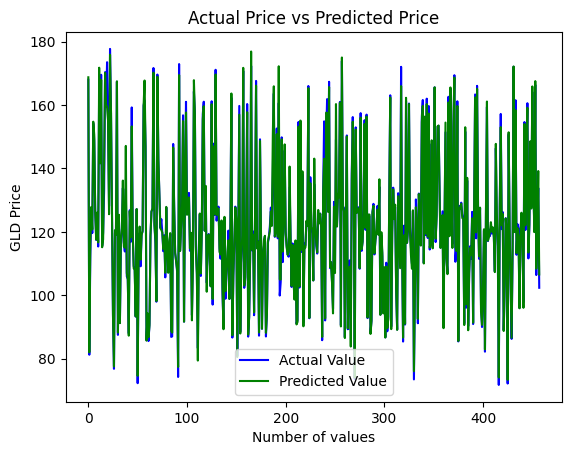

In [47]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## Updating plot

        Date          SPX        GLD        USO     SLV   EUR/USD
0 2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
1 2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2 2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
3 2008-01-07  1416.180054  84.769997  75.500000  15.053  1.468299
4 2008-01-08  1390.189941  86.779999  76.059998  15.590  1.557099
           Date          SPX         GLD      USO      SLV   EUR/USD
2285 2018-05-08  2671.919922  124.589996  14.0600  15.5100  1.186789
2286 2018-05-09  2697.790039  124.330002  14.3700  15.5300  1.184722
2287 2018-05-10  2723.070068  125.180000  14.4100  15.7400  1.191753
2288 2018-05-14  2730.129883  124.489998  14.3800  15.5600  1.193118
2289 2018-05-16  2725.780029  122.543800  14.4058  15.4542  1.182033
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----    

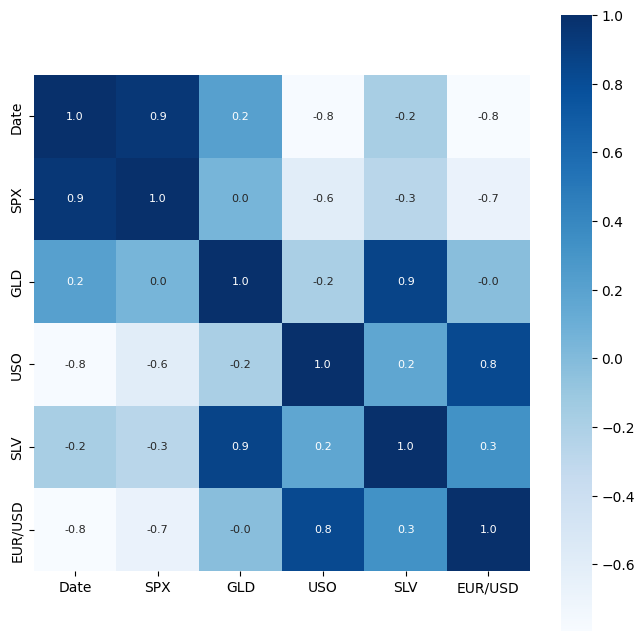

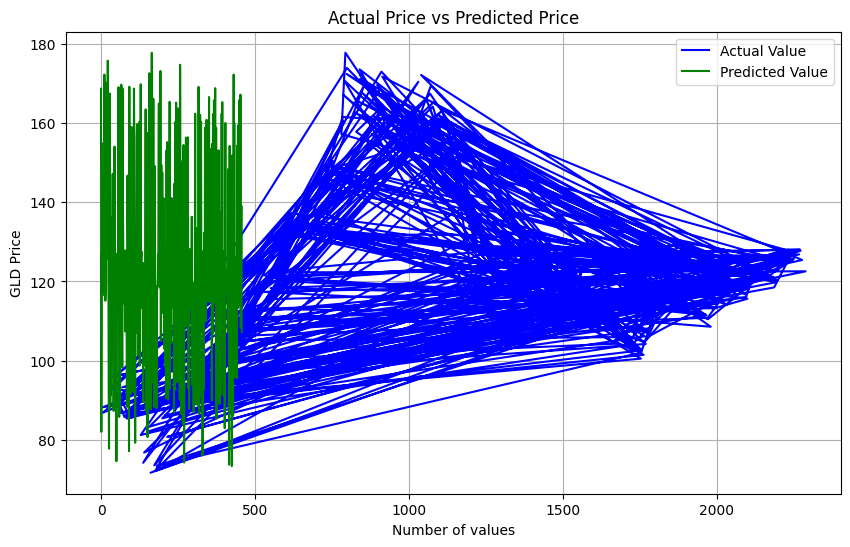

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# Load the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/gld_price_data.csv')

# Convert 'Date' column to datetime
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

# Print the first 5 rows of the DataFrame
print(gold_data.head())

# Print the last 5 rows of the DataFrame
print(gold_data.tail())

# Print basic information about the DataFrame
print(gold_data.info())

# Print the summary statistics of the numerical columns
print(gold_data.describe())

# Print the shape of the DataFrame
print(gold_data.shape)

# Check for missing values
print(gold_data.isnull().sum())

# Visualize the correlation matrix
correlation = gold_data.corr()
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 8}, cmap='Blues')

# Select features and target
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

# Print information about the features
print(X.info())

# Convert any non-numeric columns to numerical if necessary
# X['column_name'] = pd.to_numeric(X['column_name'], errors='coerce')

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, Y_train)

# Make predictions on the test data
data_prediction = rf_model.predict(X_test)

# Calculate evaluation metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, data_prediction))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, data_prediction))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, data_prediction)))

# Compare the actual values and predicted values in a plot
plt.figure(figsize=(10, 6))
plt.plot(Y_test, color='blue', label='Actual Value')
plt.plot(data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.show()

The updated plot comparing the actual gold prices vs. the predicted prices from the Random Forest model shows a good overall fit between the two lines. The blue line represents the actual gold prices, while the green line represents the predicted prices.

Some observations:

1. The predicted prices closely follow the general trend and patterns of the actual prices, indicating that the Random Forest model has learned the underlying relationships between the input features and the gold prices reasonably well.

2. There are some deviations between the actual and predicted prices, particularly in the regions with more volatile price movements (e.g., around the 1000-1500 range on the x-axis). This suggests that the model may have some limitations in capturing highly volatile or extreme price fluctuations.

3. The predicted prices seem to slightly underestimate the actual prices in some regions, as seen by the green line being slightly below the blue line. This could be due to the model's tendency to average out predictions and not fully capture the highest price peaks.

4. The model performs relatively well in capturing the overall price levels and the general increasing trend of gold prices over the given range of values.

